In [ ]:
import numpy as np
from typing import List, Optional, Dict, Set, Callable, Any, Literal
from joblib import Memory, Parallel, delayed
import torch
from torch import Tensor

from experiments.cross_validation import cv_UEA, print_cv_results
from experiments.eval_on_test import validate_UEA, print_test_results
from experiments.utils import join_dicts_from_pickle_paths, save_to_pickle, print_latex_results, load_dataset, print_shape, print_tensor
from experiments.experiment_code import run_all_kernels

# Cross Validation on Train

In [ ]:
cv_results = cv_UEA(
    dataset_names = [
        # 'CharacterTrajectories',       # N_corpus = 71, N_train = 1400 ish
        # 'Epilepsy',                    # N_corpus = 34
        # 'EthanolConcentration',        # N_corpus = 65
        # 'FingerMovements',             # N_corpus = 158
        # 'HandMovementDirection',       # N_corpus = 40
        # 'Heartbeat',                   # N_corpus = 102
        # 'LSST',                        # N_corpus = 176, N_train = 3000 ish
        # 'MotorImagery',                # N_corpus = 139
        'PEMS-SF',                     # N_corpus = 38
        # 'PhonemeSpectra',              # N_corpus = 85, N_train = 3000 ish
        # 'RacketSports',                # N_corpus = 38
        # 'SelfRegulationSCP1',          # N_corpus = 134
        # 'SelfRegulationSCP2',          # N_corpus = 100
        ],
    kernel_names = [
            #"flat linear",
            # "flat rbf",
            # "flat poly",
            # "integral rbf",
            "integral poly",
            # "trunc sig linear",
            # "trunc sig rbf",
            # "pde sig rbf",
            # "rand sig tanh",
            # "gak",
            # "reservoir",
        ],
        k_folds=4,
        n_repeats=1,
        verbose=False,
        omit_alpha=True,
        )

# Validate on Test

In [ ]:
test_results = validate_UEA(cv_results, verbose=False, device="cuda")

In [ ]:
print(test_results)
print_test_results(test_results)

# Validate on Test and Save

In [ ]:
for dataset_name, cv_res in cv_results.items():
    test_results = validate_UEA({dataset_name : cv_res}, verbose=True, device="cuda")
    save_to_pickle(test_results, f"Data/results_{dataset_name}.pkl")

# Read CV data from file and print results

In [10]:
# Load the cross validation results
cv_results = join_dicts_from_pickle_paths(
    [
    "Data/cv_Epilepsy.pkl",
    "Data/cv_EthanolConcentration.pkl",
    "Data/cv_FingerMovements.pkl",
    "Data/cv_HandMovementDirection.pkl",
    "Data/cv_Heartbeat.pkl",
    "Data/cv_LSST_part1.pkl",
    "Data/cv_LSST_part2.pkl",
    "Data/cv_LSST_part3.pkl",
    "Data/cv_MotorImagery.pkl",
    "Data/cv_PEMS-SF_part1.pkl",
    "Data/cv_PEMS-SF_part2.pkl",
    "Data/cv_PhonemeSpectra_part1.pkl",
    "Data/cv_PhonemeSpectra_part2.pkl",
    "Data/cv_PhonemeSpectra_part3.pkl", 
    "Data/cv_RacketSports.pkl",
    "Data/cv_SelfRegulationSCP1.pkl",
    "Data/cv_SelfRegulationSCP2.pkl",
    ])
print_cv_results(cv_results)

Cross Validation Results
Number of Classes: 4
Dimension of path: 3
Length: 206
Train: 137
Test: N/A

conf_results

flat linear
final_score_avgs 1.5808892520910904
alphas_score_avgs [1.575 1.575 1.581]
thresh_score_avgs [1.068 1.469 1.529 1.491 1.415 1.333 1.268 1.206 1.165 1.12  1.082 1.046
 1.016 1.007 1.009 1.01  1.01  1.006 1.007 1.008 1.029 0.89  0.728 0.72
 0.634 0.431 0.248 0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.   ]
epilepsy
{'basepoint': 'basepoint', 'time': 'time_enhance', 'normalize': True, 'threshold': 3, 'alpha': 1e-08, 'CV_train_score': 1.1881301282109091}
running
{'basepoint': 'basepoint', 'time': 'time_enhance', 'normalize': True, 'threshold': 2, 'alpha': 0.01, 'CV_train_score': 1.7415387960637574}
sawing
{'basepoint': 'basepoint', 'time': '', 'normalize': True, 'threshold': 3, 'alpha': 0.01, 'CV_train_score': 1.7392193408542682}
walking
{'basepoint': 'basepoint', 'time': 'time_enh

In [12]:
test_results = join_dicts_from_pickle_paths([
    "Data/results_Epilepsy.pkl",
    "Data/results_EthanolConcentration.pkl",
    "Data/results_FingerMovements.pkl",
    "Data/results_HandMovementDirection.pkl",
    "Data/results_Heartbeat.pkl",
    "Data/results_LSST_part1.pkl",
    "Data/results_LSST_part2.pkl",
    "Data/results_LSST_part3.pkl",
    "Data/results_MotorImagery.pkl",
    # "Data/results_PEMS-SF_part1.pkl",
    # "Data/results_PEMS-SF_part2.pkl",
    "Data/results_PhonemeSpectra_part1.pkl",
    "Data/results_PhonemeSpectra_part2.pkl",
    "Data/results_PhonemeSpectra_part3.pkl",
    "Data/results_RacketSports.pkl",
    "Data/results_SelfRegulationSCP1.pkl",
    "Data/results_SelfRegulationSCP2.pkl",
    ])
print_test_results(test_results)
print_latex_results(test_results, round_digits=2)

Test Results

Dataset: Epilepsy
Number of Classes: 4
Dimension of path: 3
Length: 206
Train: 137
Test: 138

Kernel: flat linear
Conformance AUC: 0.891
Conformance PR AUC: 0.787

Kernel: flat rbf
Conformance AUC: 0.955
Conformance PR AUC: 0.886

Kernel: flat poly
Conformance AUC: 0.91
Conformance PR AUC: 0.81

Kernel: integral rbf
Conformance AUC: 0.945
Conformance PR AUC: 0.873

Kernel: integral poly
Conformance AUC: 0.909
Conformance PR AUC: 0.773

Kernel: gak
Conformance AUC: 0.971
Conformance PR AUC: 0.925

Kernel: reservoir
Conformance AUC: 0.911
Conformance PR AUC: 0.754

Kernel: trunc sig linear
Conformance AUC: 0.98
Conformance PR AUC: 0.959

Kernel: trunc sig rbf
Conformance AUC: 0.976
Conformance PR AUC: 0.956

Kernel: pde sig rbf
Conformance AUC: 0.687
Conformance PR AUC: 0.6

Kernel: rand sig tanh
Conformance AUC: 0.917
Conformance PR AUC: 0.817

Kernel: flat linear
Mahalanobis AUC: 0.668
Mahalanobis PR AUC: 0.393

Kernel: flat rbf
Mahalanobis AUC: 0.812
Mahalanobis PR AUC: 

# Print distribution of CV params

In [13]:
import matplotlib.pyplot as plt

all_datasets = [
    "Epilepsy",
    "EthanolConcentration",
    "FingerMovements",
    "HandMovementDirection",
    "Heartbeat",
    "LSST",
    "MotorImagery",
    "PEMS-SF",
    "PhonemeSpectra",
    "RacketSports",
    "SelfRegulationSCP1",
    "SelfRegulationSCP2",
    ]

all_kernels = [
    "flat linear",
    "flat rbf",
    "flat poly",
    "integral rbf",
    "integral poly",
    "rand sig tanh",
    "trunc sig linear",
    "trunc sig rbf",
    "pde sig rbf",
    "gak",
    "reservoir",
    ]


def plot_cv_params_single_kernel(
        cv_results:Dict,
        param_name:str = "sigma", 
        kernel_name:str = "flat rbf", 
        datasets:Optional[List[str]] = None, 
        n_bins:int = 30,
    ):
    """
    For each dataset, plot the histogram of the best parameter
    values specified by 'param_name' for the kerenl "kernel_name".
    """
    if datasets is None:
        datasets = list(cv_results.keys())

    l = []
    for dataset_name, results in cv_results.items():
        if dataset_name in datasets:
            for anomaly_method in ["conf_results", "mahal_results"]:
                kernelwise_dict = results[anomaly_method]
                for ker, labelwise_dict in kernelwise_dict.items():
                    for label, param_dict in labelwise_dict.items():
                        if ker == kernel_name:
                            l.append(param_dict[param_name])
    l = np.array(l)
    l.sort()
    l = l.astype(str)

    plt.hist(l, n_bins)
    plt.xlabel(param_name)
    plt.ylabel("Frequency")
    plt.title(f"Kernel: {kernel_name}")
    plt.xticks(rotation='vertical')
    plt.show()



def plot_cv_params_all_kernels(
        cv_results:Dict,
        param_name:str = "sigma",
        kernels:Optional[List[str]] = None, 
        datasets:Optional[List[str]] = None,
        n_bins:int = 30,
    ):
    """
    For each dataset, plot the histogram of the best parameter
    values specified by 'param_name' for all the kernels.
    """
    if datasets is None:
        datasets = list(cv_results.keys())
    if kernels is None:
        kernels = list(cv_results[datasets[0]]["conf_results"].keys())

    l = []
    for dataset_name, results in cv_results.items():
        if dataset_name in datasets:
            for anomaly_method in ["conf_results", "mahal_results"]:
                kernelwise_dict = results[anomaly_method]
                for kernel_name, labelwise_dict in kernelwise_dict.items():
                    if kernel_name in kernels:
                        for label, param_dict in labelwise_dict.items():
                            if kernel_name == kernel_name:
                                if param_name in param_dict:
                                    l.append(param_dict[param_name])
    l = np.array(l)
    l.sort()
    l = l.astype(str)

    plt.hist(l, n_bins)
    plt.xlabel(param_name)
    plt.ylabel("Frequency")
    plt.title(f"All datasets: {param_name}")
    plt.xticks(rotation='vertical')
    plt.show()

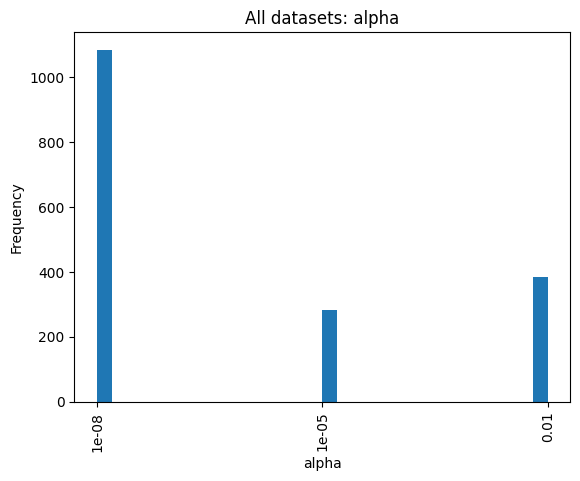

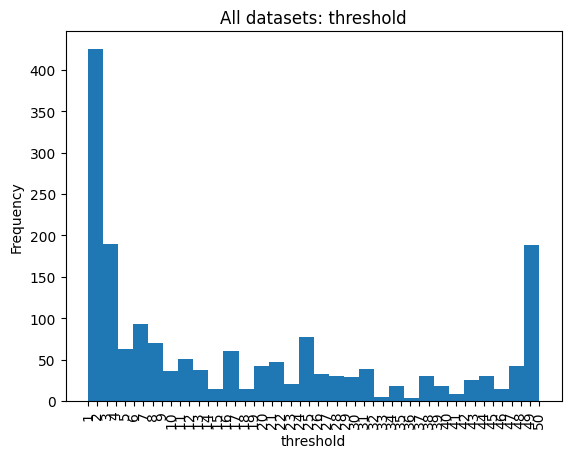

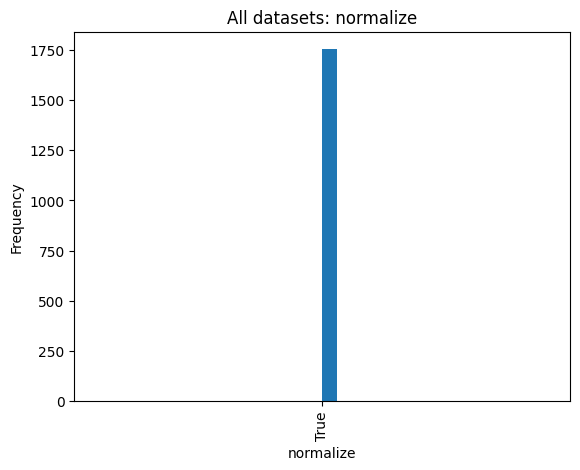

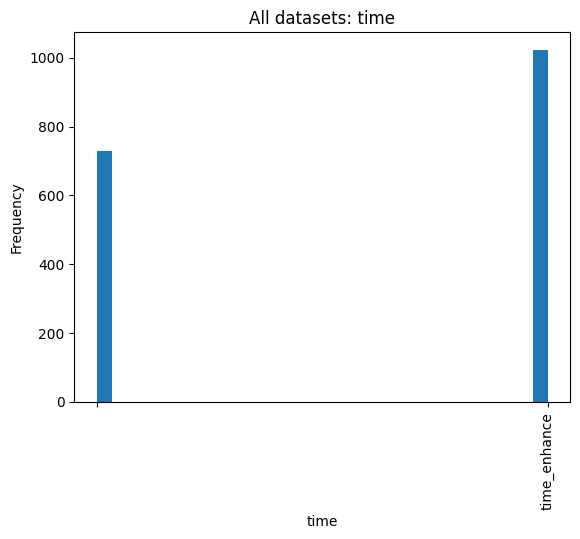

In [14]:
plot_cv_params_all_kernels(cv_results, "alpha")
plot_cv_params_all_kernels(cv_results, "threshold")
plot_cv_params_all_kernels(cv_results, "normalize")
plot_cv_params_all_kernels(cv_results, "time")

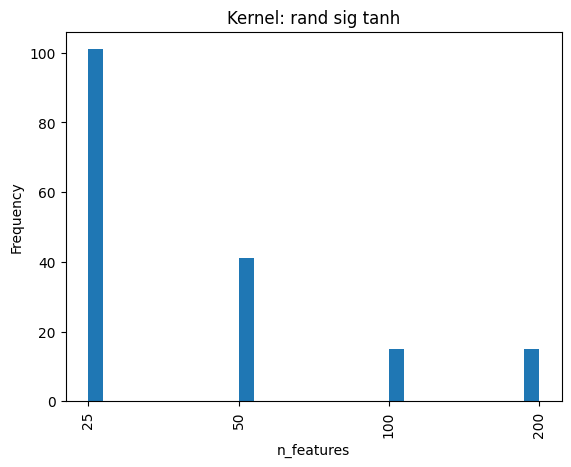

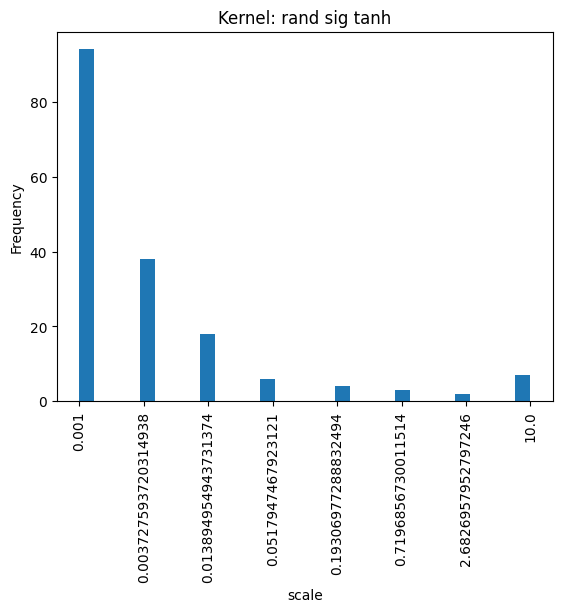

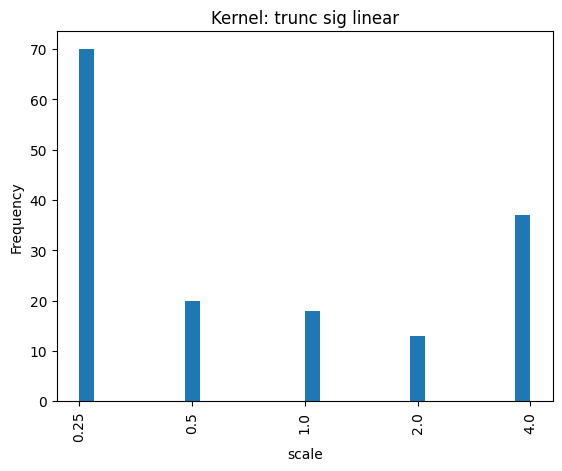

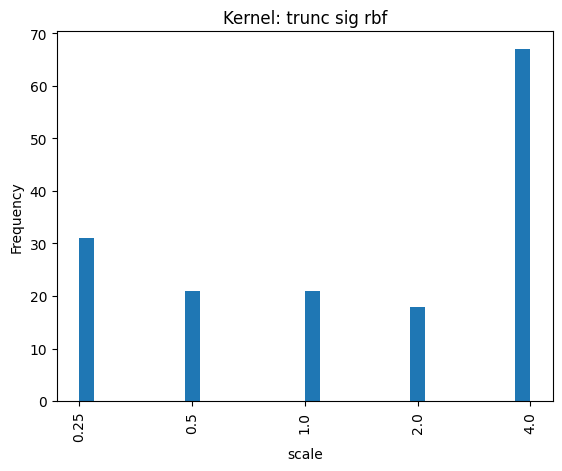

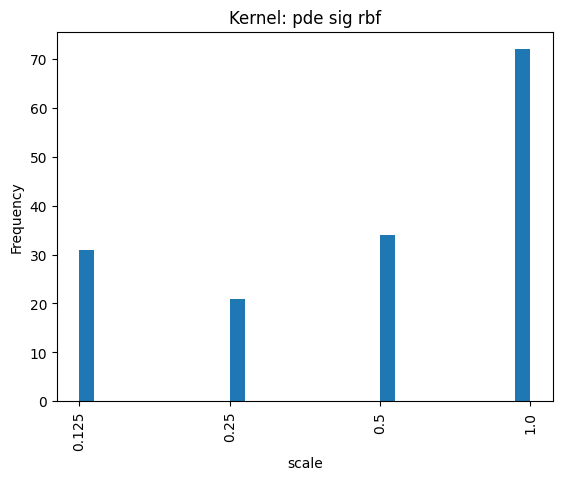

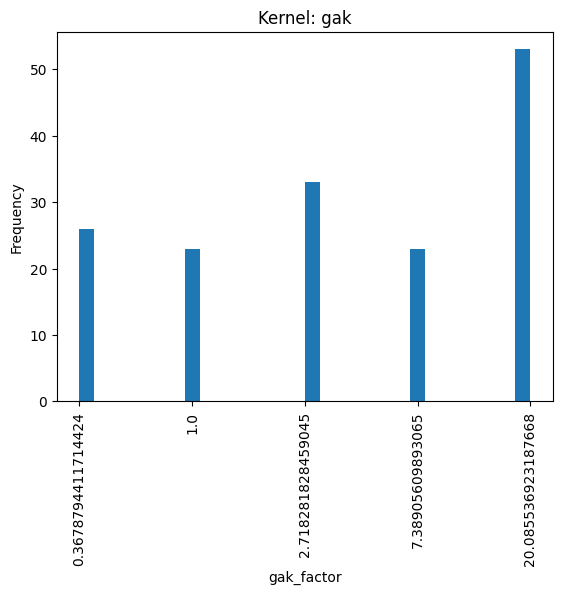

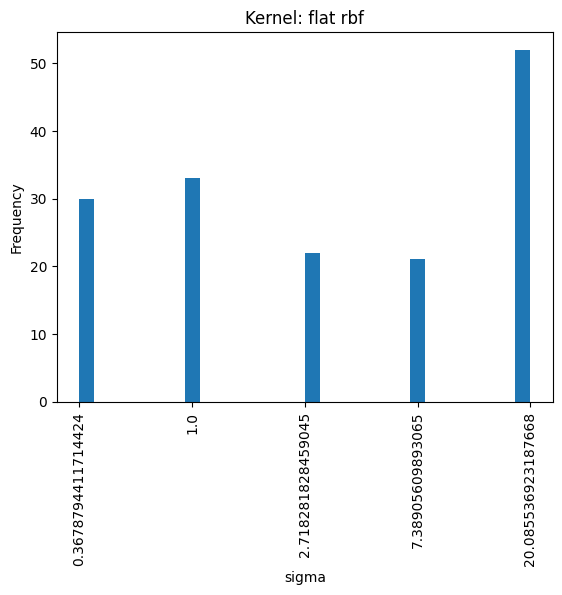

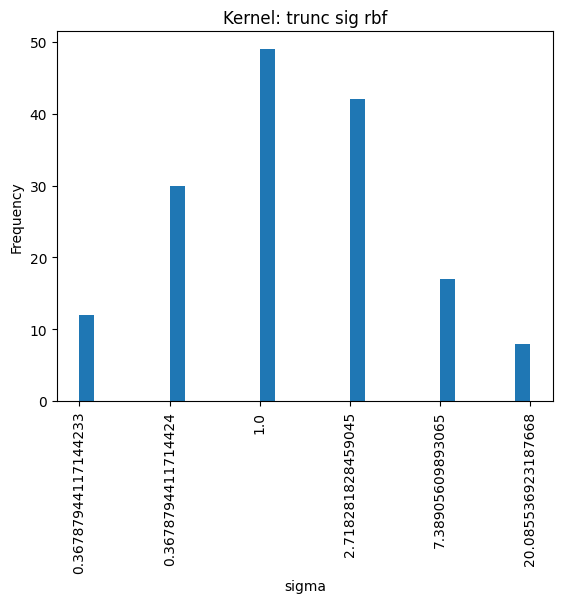

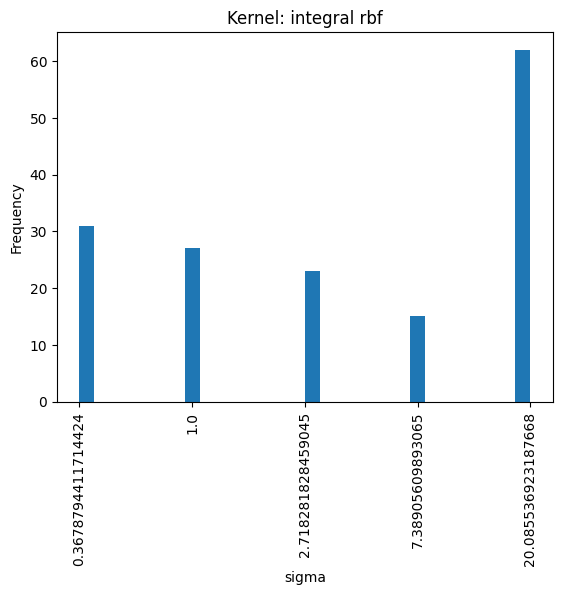

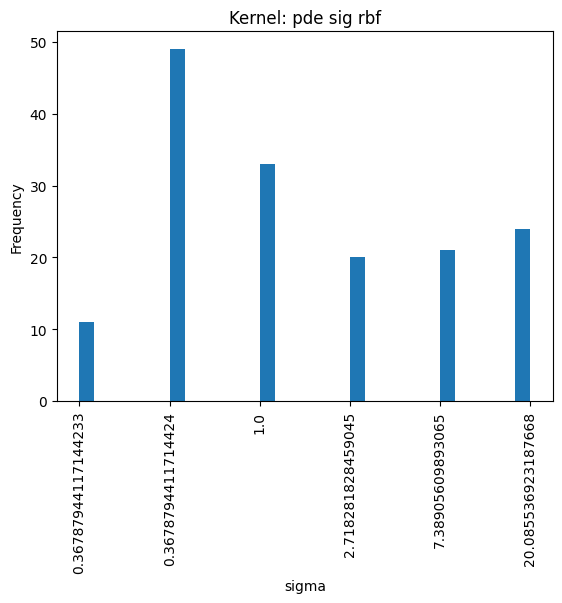

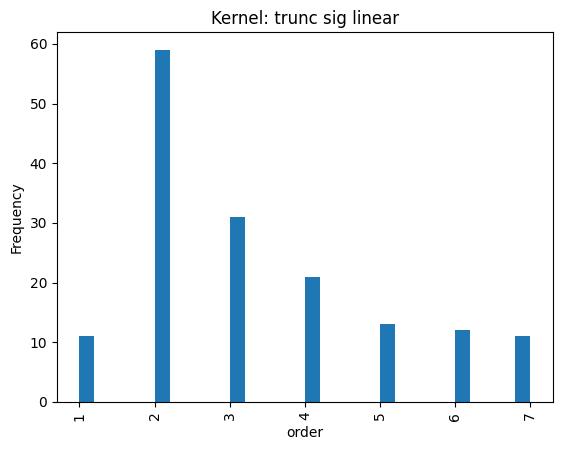

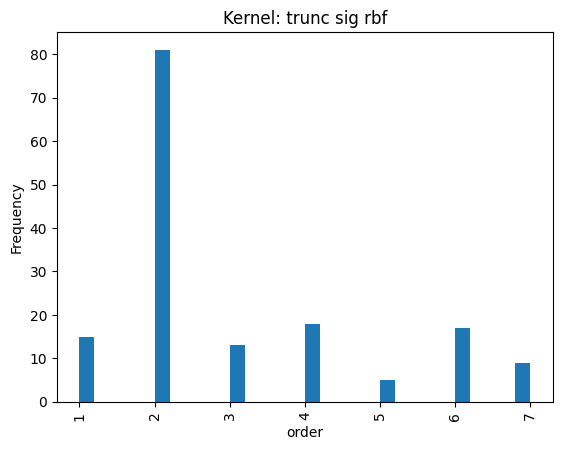

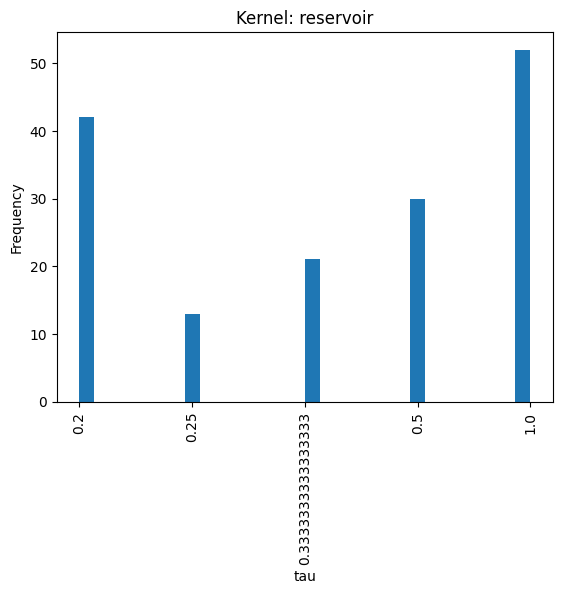

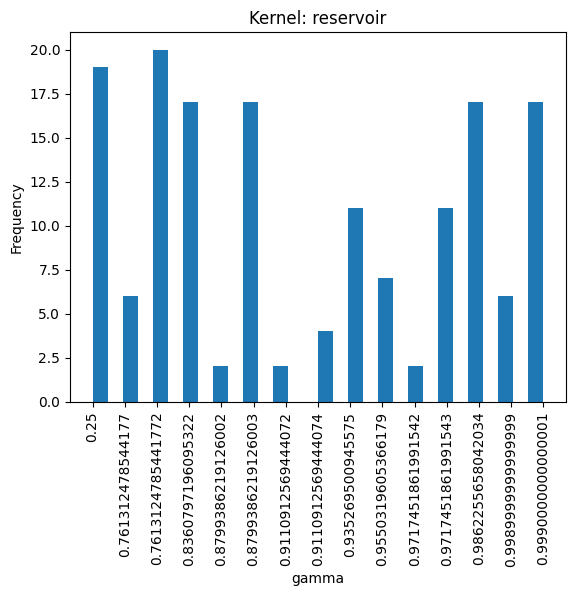

In [17]:
plot_cv_params_single_kernel(cv_results, "n_features", "rand sig tanh")
plot_cv_params_single_kernel(cv_results, "scale", "rand sig tanh")
plot_cv_params_single_kernel(cv_results, "scale", "trunc sig linear")
plot_cv_params_single_kernel(cv_results, "scale", "trunc sig rbf")
plot_cv_params_single_kernel(cv_results, "scale", "pde sig rbf")
plot_cv_params_single_kernel(cv_results, "gak_factor", "gak")
plot_cv_params_single_kernel(cv_results, "sigma", "flat rbf")
plot_cv_params_single_kernel(cv_results, "sigma", "trunc sig rbf")
plot_cv_params_single_kernel(cv_results, "sigma", "integral rbf")
plot_cv_params_single_kernel(cv_results, "sigma", "pde sig rbf")
plot_cv_params_single_kernel(cv_results, "order", "trunc sig linear")
plot_cv_params_single_kernel(cv_results, "order", "trunc sig rbf")
plot_cv_params_single_kernel(cv_results, "tau", "reservoir")
plot_cv_params_single_kernel(cv_results, "gamma", "reservoir")

# Run specific param_dict on specific dataset

In [ ]:
import torch
from typing import Dict
from experiments.experiment_code import run_all_kernels
from experiments.utils import load_dataset
import numpy as np
def run_specific_param_dict(
        dataset_name:str, 
        param_dict:Dict,
        verbose:bool = False,
        device="cuda",
    ):    
    """Runs the specific param_dict on a dataset.
    
    Args:
        dataset_name (str): Name of the dataset.
        param_dict (Dict): Dictionary of parameters.
        verbose (bool): Verbosity.
        device (str): Device for PyTorch computation.
        """
    X_train, y_train, X_test, y_test = load_dataset(dataset_name)
    X_train = torch.from_numpy(X_train).to(device)
    X_test = torch.from_numpy(X_test).to(device)
    unique_labels = np.unique(y_train)
    kernel_name = param_dict["kernel_name"]

    #create kernelwise dict
    kernelwise_dict = {kernel_name: {label: param_dict for label in unique_labels}}

    results = run_all_kernels(X_train, y_train, X_test, y_test, 
                        unique_labels, kernelwise_dict, verbose)
    aucs = results[kernel_name]
    print("Conf ROCAUC\t", aucs[0,0])
    print("Conf PRAUC\t", aucs[0,1])
    print("Mah ROCAUC\t", aucs[1,0])
    print("Mah PRAUC\t", aucs[1,1])
    return results


# General Parameters
param_dict = {
    "alpha": 0.0001,
    "threshold": 70,
    "normalize": False,
    "time": "",
    "basepoint": "basepoint",
}


# Kernel Specific Parameters
param_dict["kernel_name"] = "pde sig rbf"
param_dict["order"] = 3
param_dict["sigma"] = 10
param_dict["scale"] = 1
param_dict["gak_factor"] = 10
param_dict["dyadic_order"] = 2
param_dict["gamma"] = 0.999
param_dict["tau"] = 1/5.5/np.sqrt(10)

res = run_specific_param_dict("CharacterTrajectories", param_dict, verbose=True)